# What Makes a Kickstarter Project Successful

We used a Docker container to create a data analysis and manipulation lab, that will be presented within this Jupyter notebook. 

Data is 378,000 projects provided by [Kaggle user Kemical](https://www.kaggle.com/kemical)

### Technologies Used
* Python
* Docker
* Docker Compose
* Pandas
* Numpy
* Matplotlib
* Jupyter Notebook

## Using Docker-Compose to Host Jupyter Notebook

We needed a way to consistently work on our dataset within the docker container and have that work persist through data manipulation sessions. We decided to use Docker Compose to bootstrap a Jupyter Notebook image into a container that we could access locally through our browser.

```
file: docker-compose.yml
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
version:                "3"
services:
  datascience-notebook:
      image:            jupyter/datascience-notebook
      volumes:
        - $PWD:/home/jovyan
      ports:
        - 8888:8888
      container_name:   datascience-notebook-container
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~      
```

with this file we were about to run the command `docker-compose up` in our shell to access the Jupyter GUI.

## How do we Create a Successful Kickstarter Campaign?

First we're going to to need some tools in order to start analyzing and manipulating data, namely __Pandas__, __Numpy__, and __Pyplot__ from __Matplotlib__. We will then provide the dataset to our program, so that we can start manipulating it.

In [1]:
import pandas as pd
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

Here is a quick glimpse of what that data looks like:

In [2]:
df = pd.read_csv("~/Data/ks-projects-201801.csv")
print(df.head(10))

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   
5  1000014025                               Monarch Espresso Bar   
6  1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
7  1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
8  1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
9   100004195  STUDIO IN THE SKY - A Documentary Feature Film...   

         category main_category currency    deadline      goal  \
0          Poetry    Publishing      GBP  2015-10-09    1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01   30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26 

Dope! We got data. Let's now get a visual on successes and failures based on goal size

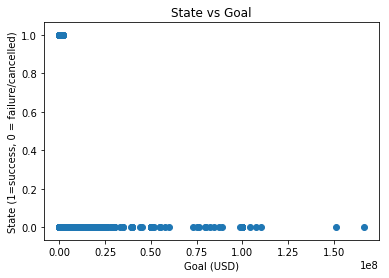

In [3]:
df['state_binary'] = df['state'].apply(lambda s: True if s == "successful" else False)
fig1, ax1 = plt.subplots()
ax1.scatter(df['usd_goal_real'], df['state_binary'])
ax1.set_xlabel('Goal (USD)')
ax1.set_ylabel('State (1=success, 0 = failure/cancelled)')
ax1.set_title('State vs Goal')
plt.show(block=False)

So So this doesn't really show us much, except that after a certain goal size nobody's project succeeds. Let's run some more calculations to get some more concrete ideas.

In [4]:
print()
print("Total number of successes = {:d}".format(np.sum(df['state_binary'])))
print("Total number of failures and cancelled = {:d}".format(np.sum(~df['state_binary'])))
print("This means that about {:.2f}% of Kickstarter campaigns in our data were successful".format((np.sum(df['state_binary'])/df.shape[0]) * 100))


Total number of successes = 133956
Total number of failures and cancelled = 244705
This means that about 35.38% of Kickstarter campaigns in our data were successful


given our graph, this is somewhat surprising. It's obvious that almost all the successes are clustered in a certain goal range. Let's choose some bin ranges along the goal axis and plot a bar graph of the percentage of campaigns that were successful in each bin in order to see if anything stands out.

The bin ranges we'll use are:
* 0-10 
* 11-100 
* 101-1000
* 1001-10000
* 10001-100000
* 100001-1000000

In [5]:
bin_ranges = ((0, 10), (11, 100), (101, 1000), (1001, 10000), (10001, 100000), (100001, 1000000))
def get_att_in_range(df, lower, upper):
    return df[df['usd_goal_real'].between(lower, upper, inclusive=True)].shape[0]

def get_succ_in_range(df, lower, upper):
    return sum(df[df['usd_goal_real'].between(lower, upper, inclusive=True)]['state_binary'])

def get_perc_suc_in_range(df, lower, upper):
    return get_succ_in_range(df, lower, upper)/get_att_in_range(df, lower, upper) * 100

First let's check out the percentage of successful projects in each of the bin ranges.

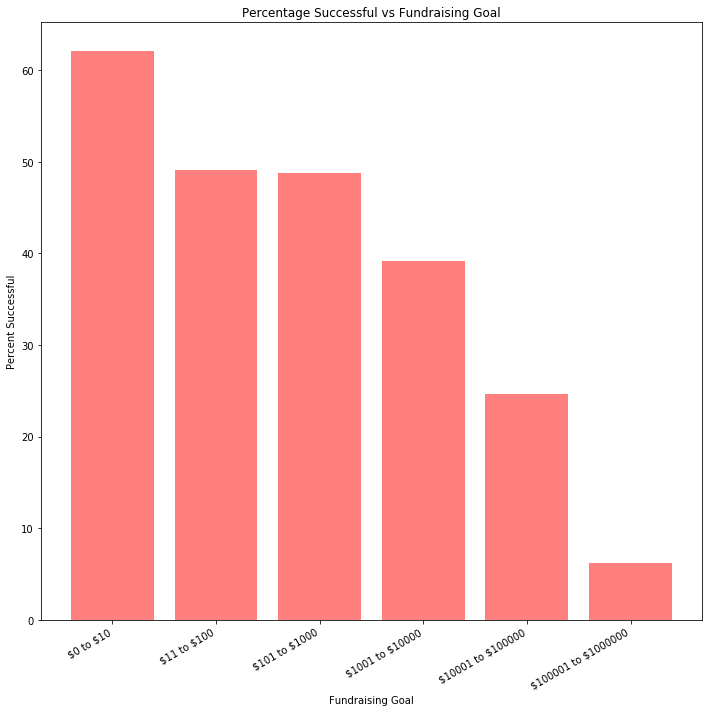

In [6]:
fig2, ax2 = plt.subplots()
percent_succ_in_range = [get_perc_suc_in_range(df, br[0], br[1]) for br in bin_ranges]
b1, b2, b3, b4, b5, b6 = ax2.bar(np.arange(1,7), percent_succ_in_range, color='r', alpha=0.5)
x_labs = ["\$"+ str(br[0]) + " to \$" +str(br[1]) for br in bin_ranges]
ax2.set_xticks(np.arange(1,7))
ax2.set_xticklabels(x_labs, rotation=30, ha='right')
ax2.set_xlabel('Fundraising Goal')
ax2.set_ylabel('Percent Successful')
ax2.set_title('Percentage Successful vs Fundraising Goal')
fig2.set_figheight(10)
fig2.set_figwidth(10)
plt.tight_layout()
plt.show(block=False)

Those are some pretty good success perentages. About 50% of projects from the \$101 - \$1000 range succeed, but these values don't really tell a complete story. One question you might have is what are the the total number of projects in these ranges? Let's plot successful over total attempts in each range to get a better view of what the data is telling us.

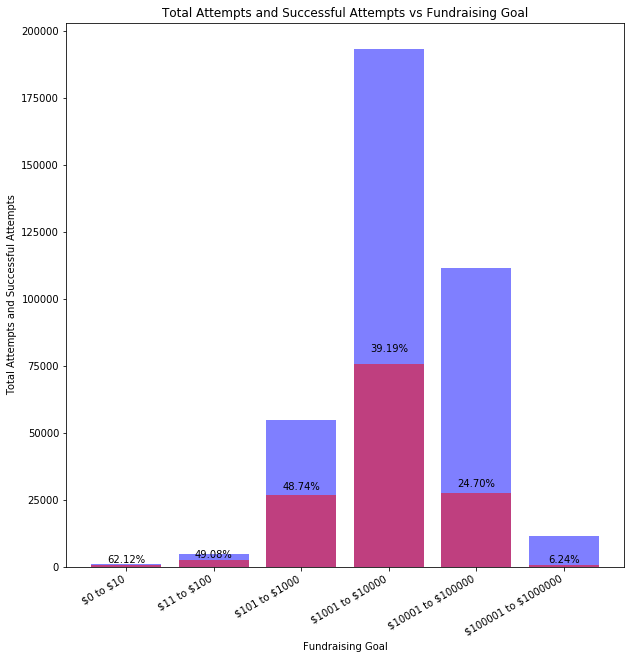

In [7]:
def label_rects(ax, rects, labs):
    i = 0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                labs[i], ha='center', va='bottom')
        i+=1

fig3, ax3 = plt.subplots()
att_in_range = np.array([get_att_in_range(df, br[0], br[1]) for br in bin_ranges])
succ_in_range = np.array([get_succ_in_range(df, br[0], br[1]) for br in bin_ranges])
ax3.bar(np.arange(1,7), att_in_range, color='b', alpha=0.5)
rects = ax3.bar(np.arange(1,7), succ_in_range, color='r', alpha=0.5)
x_labs = ["\$"+ str(br[0]) + " to \$" +str(br[1]) for br in bin_ranges]
bar_labs = ["{:.2f}".format(perc) + "%" for perc in percent_succ_in_range]
ax3.set_xticks(np.arange(1,7))
ax3.set_xticklabels(x_labs, rotation=30, ha='right')
ax3.set_xlabel('Fundraising Goal')
ax3.set_ylabel('Total Attempts and Successful Attempts')
ax3.set_title('Total Attempts and Successful Attempts vs Fundraising Goal')
label_rects(ax3, rects, bar_labs)
fig3.set_figheight(10)
fig3.set_figwidth(10)
plt.show(block=False)

In [8]:
def get_df_att_in_range(df, lower, upper):
    return df[df['usd_goal_real'].between(lower, upper, inclusive=True)]

def get_df_succ_in_range(df, lower, upper):
    temp = df[df['usd_goal_real'].between(lower, upper, inclusive=True)]
    return temp.loc[temp['state_binary'] == True]


In [ ]:
succ = get_df_succ_in_range(df, 100, 100000)
att = get_df_att_in_range(df, 100, 100000)

In [ ]:
fig4, ax4 = plt.subplots()
hist_bins = [x for x in range(1, 100001, 5000)]
n_att, bins2, p2 = ax4.hist(att['usd_goal_real'], bins=hist_bins, color='b', alpha=0.5)
n_succ, bins, p = ax4.hist(succ['usd_goal_real'], bins=hist_bins, color='r', alpha=0.5)
n_perc = n_succ/n_att * 100
ax4.set_xlabel('Fundraising Goal (USD)')
ax4.set_ylabel('Total Attempts and Successful Attempts')
ax4.set_title('Total Attempts and Successful Attempts vs Fundraising Goal')

def label_bins(ax, n_perc, bins, n_succ):
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for perc, x, n in zip(n_perc, bin_centers, n_succ):
        ax.annotate("{:.0f}".format(perc)+"%", xy=(x, n), xycoords='data',
            xytext=(0, 10), textcoords='offset points', va='top', ha='center')

label_bins(ax4, n_perc, bins, n_succ)
plt.tight_layout()
plt.show()

From that we can see that while there is a high percentage of successes in ranges like \$0 to \$10, and \$11 to \$100, the number of attempts is very low. Most of the interesting data lies in kickstarter campaigns between \$100 and \$100,000. Let's create a histogram to get a higher resolution image of what's going on in that range